In [1]:
!nvidia-smi
!pip install xgboost
!pip install vaex
!pip install dask
!pip install dask-ml
!pip install dask-cuda
!pip install duckdb
!pip install polars
!pip install polars[numpy,pyarrow]
!pip install pyarrow
#!pip install polars[gpu] --extra-index-url=https://pypi.nvidia.com
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install seaborn
#!pip install --extra-index-url=https://pypi.nvidia.com cudf-cu12
!pip install duckdb pandas jupysql matplotlib

Tue Dec 10 22:19:22 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   42C    P8              2W /   98W |     562MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
import pyarrow as pa
import numpy as np
import polars as pl
import glob as glob
import duckdb
import os
import time
from ipywidgets import FloatProgress
from IPython.display import display

In [525]:
def count_rows_in_parquet(directory):
 
    total_rows = 0

    for file_name in os.listdir(directory):
        if file_name.endswith('.parquet'):
            file_path = os.path.join(directory, file_name)
            
            df = pd.read_parquet(file_path)
            
            total_rows += len(df)
            print(f"{file_name}: {len(df)} rows")
    
    return total_rows

directory_path = os.getcwd()

#total_rows = count_rows_in_parquet(directory_path)
#print(f"Total rows in all Parquet files: {total_rows}")

In [527]:
import os
os.getcwd()

'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis'

In [529]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 '.tmp',
 'Comparing.txt',
 'Countparquetrows.py',
 'dataset',
 'dataset_description.pdf',
 'EDA.xlsx',
 'LICENSE',
 'Mergeparquetfiles.py',
 'plots',
 'Report.docx',
 'report.xlsx',
 'requirements.txt',
 'test.ipynb',
 'To perform Exploratory Data Analysi.txt',
 '~$EDA.xlsx']

In [3]:
pq_files_2019 = glob.glob(f'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\dataset\\fhvhv\\2019\\*.parquet')
pq_files_2020 = glob.glob(f'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\dataset\\fhvhv\\2020\\*.parquet')
pq_files_2021 = glob.glob(f'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\dataset\\fhvhv\\2021\\*.parquet')
pq_files_2022 = glob.glob(f'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\dataset\\fhvhv\\2022\\*.parquet')
pq_files_2023 = glob.glob(f'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\dataset\\fhvhv\\2023\\*.parquet')
pq_files_2024 = glob.glob(f'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\dataset\\fhvhv\\2024\\*.parquet')

In [399]:
# Total number of rides by each company fro the year 2019-2024
# File Paths:
    #pq_files_2019
    #pq_files_2020
    #pq_files_2021
    #pq_files_2022
    #pq_files_2023
    #pq_files_2024
def total_num_rides(file_path,year):
    conn = duckdb.connect()
    months = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sept','Oct','Nov','Dec']
    if file_path == pq_files_2019:
        months = months[1:]
    if file_path == pq_files_2024:
        months = months[:8]
        
    data = {'Month':months,
            'Uber':[],
            'Lyft':[],
            'Juno':[],
            'Via':[]}    
    pq_files = file_path
    print(f'*************{year}*************\n')
    for indx,month in enumerate(pq_files):
        df = conn.query(f"""SELECT 
                               CASE 
                                 WHEN hvfhs_license_num = 'HV0002' THEN 'Juno'
                                 WHEN hvfhs_license_num = 'HV0003' THEN 'Uber'
                                 WHEN hvfhs_license_num = 'HV0004' THEN 'Via'
                                 WHEN hvfhs_license_num = 'HV0005' THEN 'Lyft'
                                 ELSE 'Unknown'
                                 END AS Company,           
                                COUNT(*) AS num_rides_{months[indx]}_{year}
                             FROM read_parquet('{month}')
                             GROUP BY Company;""").df()
        for company in ['Uber', 'Lyft', 'Juno', 'Via']:
            if company in df['Company'].values:
                data[company].append(df[df['Company'] == company][f'num_rides_{months[indx]}_{year}'].values[0])
            else:
                data[company].append(0)
        #print(df.head(5))
        #print('\n')
    #print(data)    
    print(pd.DataFrame(data))
    return pd.DataFrame(data)

In [400]:
def plot_num_of_rides(df,year):
    plt.figure(figsize=(14, 8))
    plt.plot(df['Month'], df['Uber'], marker='o', color='black', label='Uber')
    plt.plot(df['Month'], df['Lyft'], marker='o', color='#E73879', label='Lyft')
    plt.plot(df['Month'], df['Juno'], marker='o', color='#0A5EB0', label='Juno')
    plt.plot(df['Month'], df['Via'], marker='o', color='cyan', label='Via')
    plt.title(f'Total Number of Rides by Each Company {year}', fontsize=20, fontweight='bold')
    plt.xlabel("Company",fontsize=14)
    plt.ylabel("Number of rides",fontsize=14)
    plt.xticks(ticks=range(len(df['Month'])), labels=df['Month'], fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.legend(title='company')
    plt.grid(axis='y',linestyle='--',alpha=0.7)

    ax = plt.gca()
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    ax.yaxis.get_major_formatter().set_scientific(False)
    
    plt.tight_layout()
    plt.savefig(f'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\plots\\Total_Number_of_Rides_by_Each_Company\\rides_plot_{year}.jpeg', dpi=300, bbox_inches='tight')
    plt.show()
   

*************2019*************

   Month      Uber     Lyft    Juno      Via
0    Feb  13504994  4690916  979266   983926
1    Mar  17248340  4699040  835215  1082003
2    Apr  15657454  4290694  740532  1046142
3    May  15876126  4681802  742053  1029266
4   June  14397173  4999262  674839   930716
5    Jul  14043151  4682351  658012   919798
6    Aug  13926310  4698486  619663   881654
7   Sept  13964852  4611514  625981   866974
8    Oct  14509894  5346315  407494   898587
9    Nov  15611001  5144737  105879   773951
10   Dec  16105724  5430612       0   707565


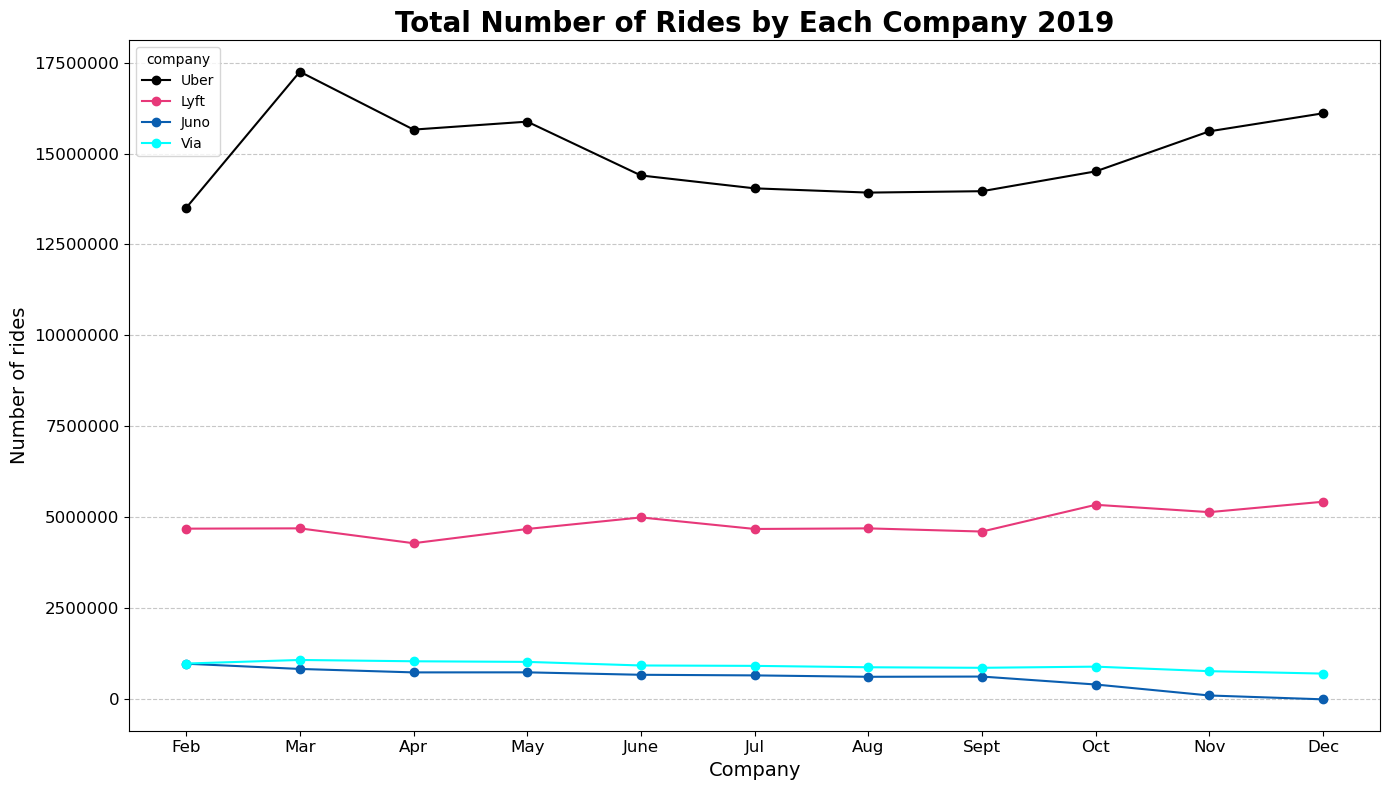

In [401]:
total = total_num_rides(pq_files_2019,2019)
plot_num_of_rides(total,2019)

*************2020*************

   Month      Uber     Lyft  Juno     Via
0    Jan  14582520  5274248     0  712600
1    Feb  15743610  5339549     0  641941
2    Mar   9836781  3219541     0  336606
3    Apr   3102835  1144083     0   65991
4    May   4359377  1621495     0  109127
5   June   5114308  2310860     0  130025
6    Jul   7081522  2716099     0  160833
7    Aug   7856499  3072675     0  167678
8   Sept   8847755  3116906     0  142008
9    Oct   9797775  3323082     0  147554
10   Nov   8375281  3090686     0  130898
11   Dec   8486416  3023412     0  127295


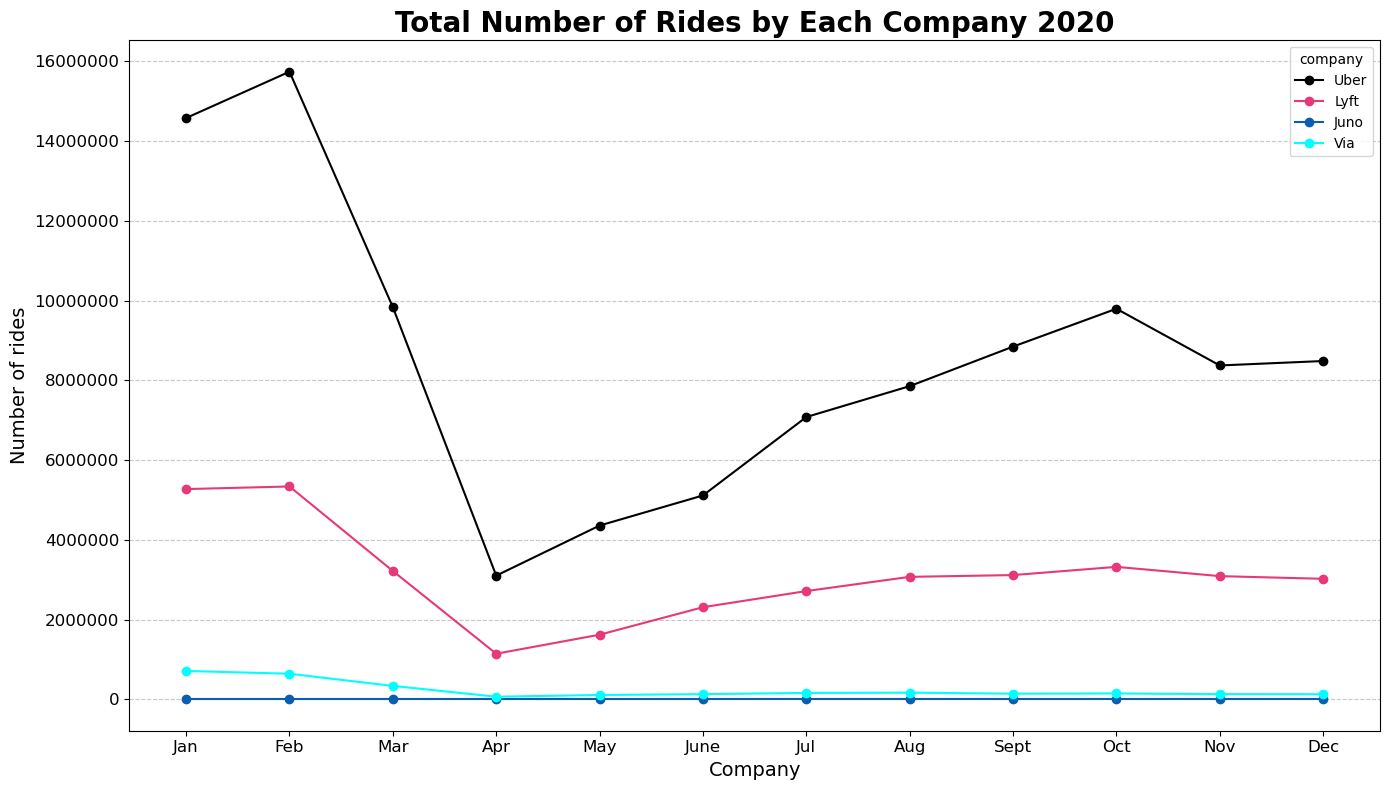

In [403]:
total = total_num_rides(pq_files_2020,2020)
plot_num_of_rides(total,2020)

*************2021*************

   Month      Uber     Lyft  Juno     Via
0    Jan   8704128  3094325     0  110015
1    Feb   8290758  3237166     0   86018
2    Mar  10173376  3946703     0  107314
3    Apr  10238382  3768879     0  104110
4    May  10808415  3814434     0   96322
5   June  10747390  4130660     0   83842
6    Jul  10704366  4229852     0   92956
7    Aug  10196747  4209240     0   93709
8   Sept  10557442  4240481     0   88132
9    Oct  12086389  4429566     0   29401
10   Nov  11819597  4222042     0       0
11   Dec  11802074  4252421     0       0


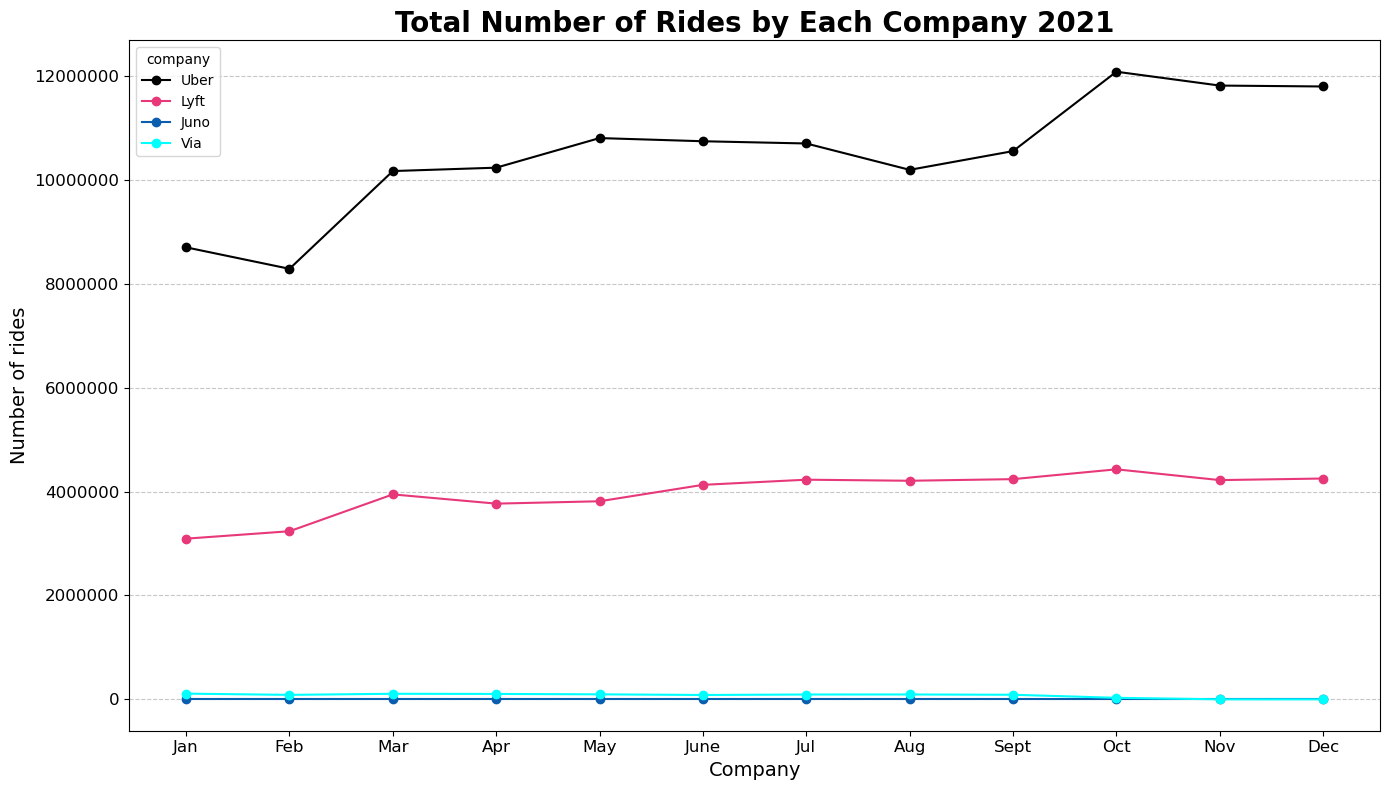

In [404]:
total = total_num_rides(pq_files_2021,2021)
plot_num_of_rides(total,2021)

*************2022*************

   Month      Uber     Lyft  Juno  Via
0    Jan  10826336  3925255     0    0
1    Feb  11440898  4578385     0    0
2    Mar  13136268  5317280     0    0
3    Apr  13010980  4741581     0    0
4    May  13325434  4831901     0    0
5   June  13049858  4730217     0    0
6    Jul  12575713  4888906     0    0
7    Aug  12500703  4684984     0    0
8   Sept  12902315  4891236     0    0
9    Oct  14102892  5203198     0    0
10   Nov  12968005  5117891     0    0
11   Dec  14007908  5657939     0    0


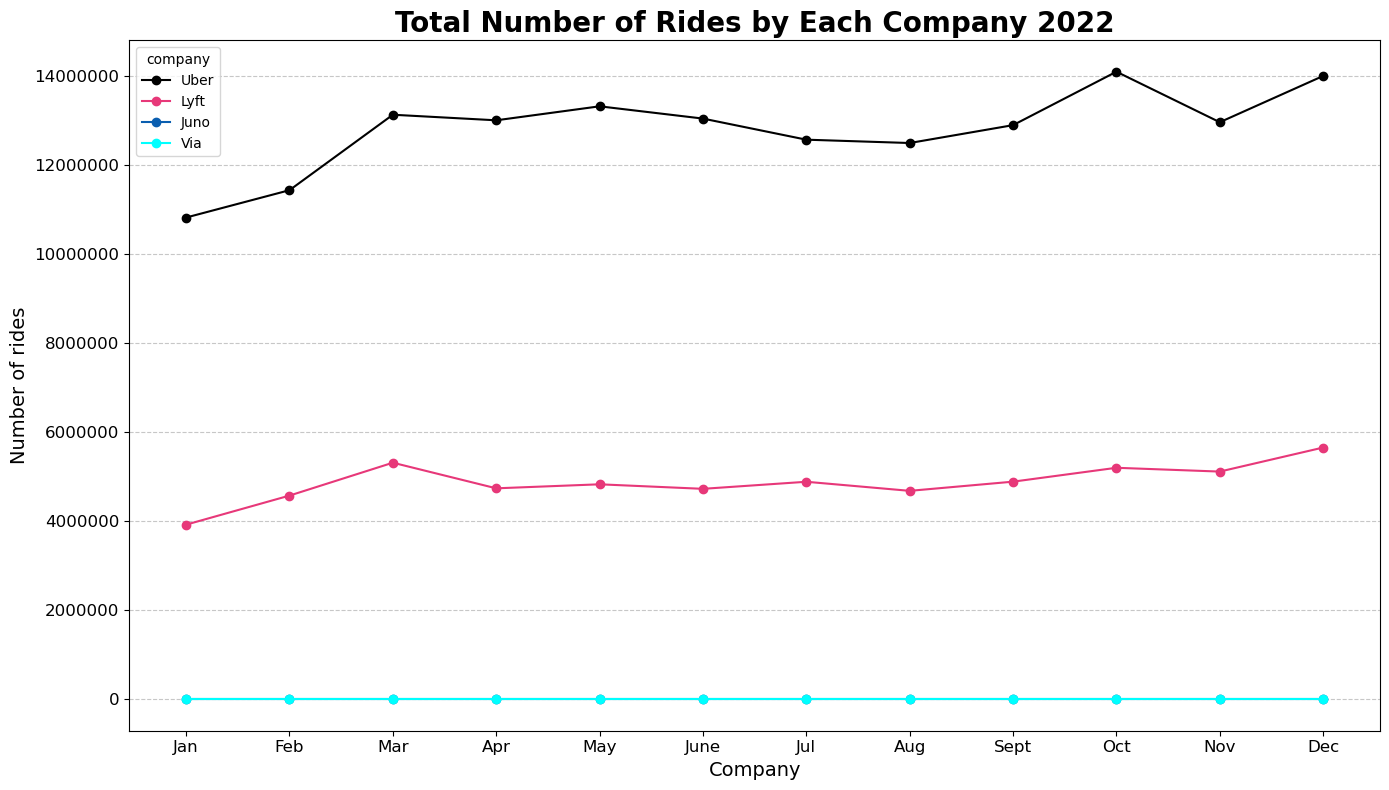

In [405]:
total = total_num_rides(pq_files_2022,2022)
plot_num_of_rides(total,2022)

*************2023*************

   Month      Uber     Lyft  Juno  Via
0    Jan  13580152  4898879     0    0
1    Feb  13280939  4680032     0    0
2    Mar  14553368  5860171     0    0
3    Apr  13998413  5146490     0    0
4    May  14277828  5569848     0    0
5   June  13811993  5554626     0    0
6    Jul  13731861  5400270     0    0
7    Aug  13143169  5178981     0    0
8   Sept  14311606  5539517     0    0
9    Oct  14375602  5810728     0    0
10   Nov  13788773  5480477     0    0
11   Dec  14273626  6242671     0    0


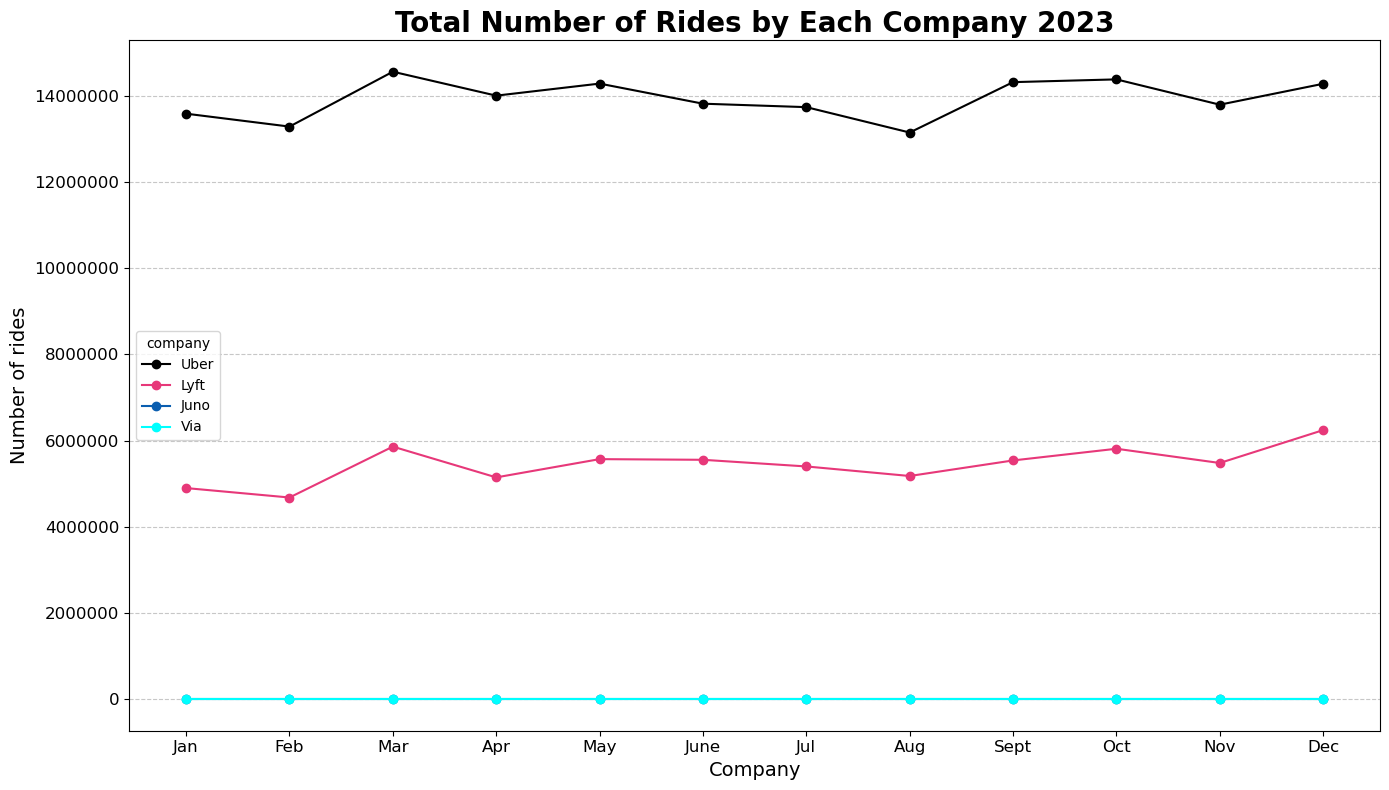

In [406]:
total = total_num_rides(pq_files_2023,2023)
plot_num_of_rides(total,2023)

*************2024*************

  Month      Uber     Lyft  Juno  Via
0   Jan  14432755  5231175     0    0
1   Feb  14409305  4949843     0    0
2   Mar  15621998  5658790     0    0
3   Apr  14704197  5028841     0    0
4   May  15538267  5166271     0    0
5  June  15158032  4965194     0    0
6   Jul  14328764  4854170     0    0
7   Aug  14107392  5021000     0    0


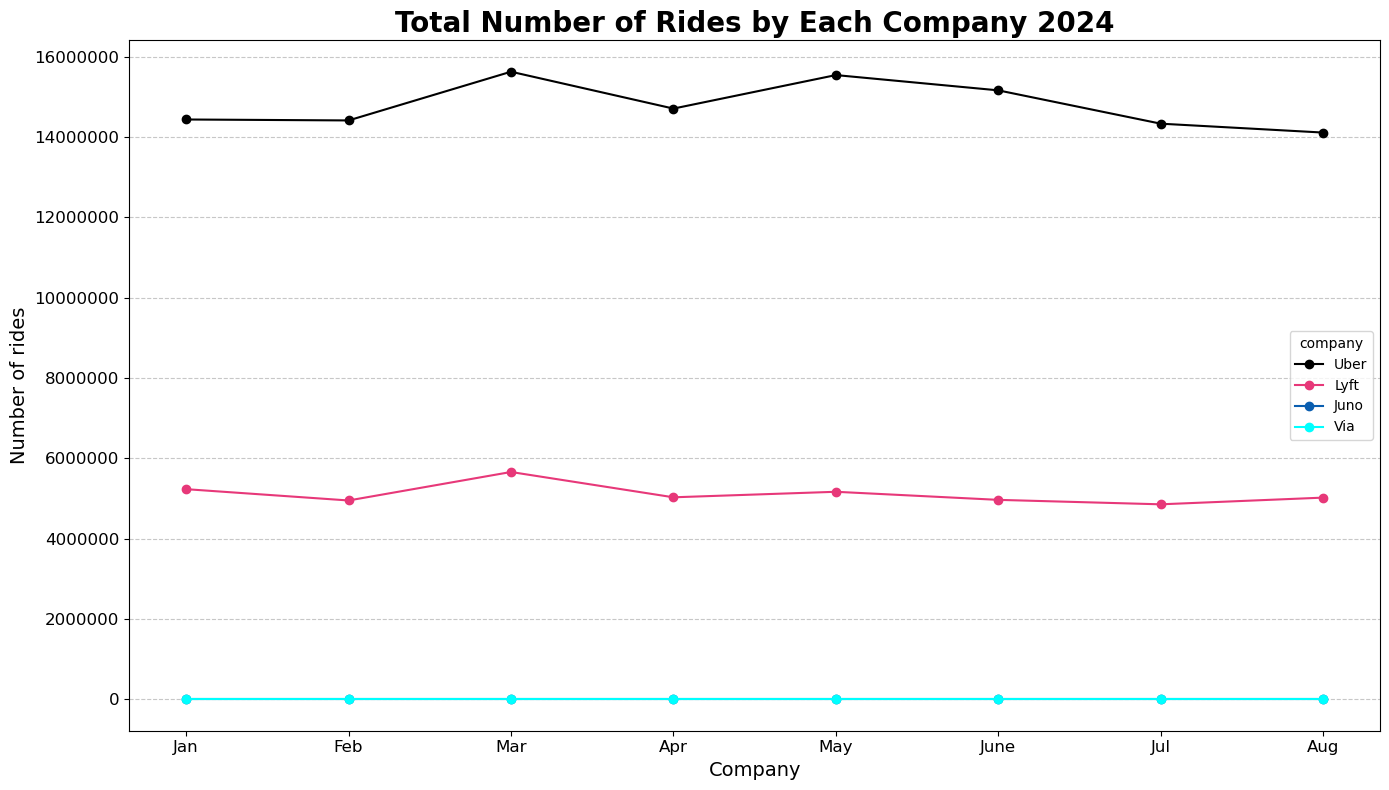

In [407]:
total = total_num_rides(pq_files_2024,2024)
plot_num_of_rides(total,2024)

In [649]:
# Total row Count  and nulls in each column from 2019-2024
# File Paths:
    #pq_files_2019
    #pq_files_2020
    #pq_files_2021
    #pq_files_2022
    #pq_files_2023
    #pq_files_2024
def null_counts(file_path):
    for file in file_path:
        print(f""" NULLS FOR {file[118:125]}\n""")
        data = pd.read_parquet(file)
        print(f"""Total no. of records = {len(data)}\n""")
        columns = data.columns
        for column in columns:
            print(f"""Total nulls in {column} = {data[column].isnull().sum()}""")
        print('\n')    

In [821]:
# Replacing Nulls in airport_fee column from 2019-2024
# File Paths:
    #pq_files_2019
    #pq_files_2020
    #pq_files_2021
    #pq_files_2022
    #pq_files_2023
    #pq_files_2024
def nulls_handling(file_path):
    for file in file_path:
        
        print(f""" Replace Nulls For {file[118:125]}\n""")
        data = pd.read_parquet(file)
        destination = file[:98]+f"{file[118:122]}\\cleaned_{file[118:122]}\\{file[103:125]}_cleaned.parquet"
        
        ###################### airport_fee column ###################
        print("""****Replacing NUlls for airport_fee column****\n""")
        print(f"""Total no. of records before replacement = {len(data)}""")
        print(f"""Total nulls in airport_fee column = {data['airport_fee'].isnull().sum()}""")
        data['airport_fee'].fillna(0,inplace=True)
        print(f"""Total no. of records after replacement  = {len(data)}\n""")
        
        ###################### wav_match_flag column ###################
        print("""****Replacing NUlls for wav_match_flag column****\n""")
        print(f"""Total no. of records before replacement  = {len(data)}""")
        print(f"""Total nulls in wav_match_flag column = {data['wav_match_flag'].isnull().sum()}""")
        data['wav_match_flag'].fillna('N',inplace=True)
        print(f"""Total no. of records after replacement  = {len(data)}\n""")

        ###################### congestion_surcharge column ###################
        print("""****Replacing NUlls for congestion_surcharge column****\n""")
        print(f"""Total no. of records before replacement  = {len(data)}""")
        print(f"""Total nulls in congestion_surcharge = {data['congestion_surcharge'].isnull().sum()}""")
        data['congestion_surcharge'].fillna(0,inplace=True)
        print(f"""Total no. of records after replacement  = {len(data)}\n""")

        ###################### on_scene_datetime column ###################
        print("""****Replacing NUlls for on_scene_datetime column****\n""")
        print(f"""Total no. of records before replacement  = {len(data)}""")
        print(f"""Total nulls in on_scene_datetime column = {data['on_scene_datetime'].isnull().sum()}""")
        data.dropna(subset=['on_scene_datetime'],inplace=True)
        print(f"""Total no. of records after replacement  = {len(data)}\n""")

        ###################### dispatching_base_num column ###################
        print("""****Replacing NUlls for dispatching_base_num column****\n""")
        print(f"""Total no. of records before replacement  = {len(data)}""")
        print(f"""Total nulls in dispatching_base_num column = {data['dispatching_base_num'].isnull().sum()}""")
        data.dropna(subset=['dispatching_base_num'],inplace=True)
        print(f"""Total no. of records after replacement  = {len(data)}\n""")

         ###################### originating_base_num column ##################
        print("""****Replacing NUlls for originating_base_num column****\n""")
        print(f"""Total no. of records before replacement  = {len(data)}""")
        print(f"""Total nulls in originating_base_num column = {data['originating_base_num'].isnull().sum()}""")
        data.dropna(subset=['originating_base_num'],inplace=True)
        print(f"""Total no. of records after replacement  = {len(data)}\n""")
        
        ###################### Save the cleaned data as new parquet file #######
        table = pa.Table.from_pandas(data)
        pa.parquet.write_table(table, destination)
        print("Data cleaned and saved as Parquet file successfully!\n")
        

In [823]:
nulls_handling(pq_files_2019)
nulls_handling(pq_files_2020)
nulls_handling(pq_files_2021)
nulls_handling(pq_files_2022)
nulls_handling(pq_files_2023)
nulls_handling(pq_files_2024)

 Replace Nulls For 2019-02

****Replacing NUlls for airport_fee column****

Total no. of records before replacement = 20159102
Total nulls in airport_fee column = 20159102
Total no. of records after replacement  = 20159102

****Replacing NUlls for wav_match_flag column****

Total no. of records before replacement  = 20159102
Total nulls in wav_match_flag column = 20159102
Total no. of records after replacement  = 20159102

****Replacing NUlls for congestion_surcharge column****

Total no. of records before replacement  = 20159102
Total nulls in congestion_surcharge = 513041
Total no. of records after replacement  = 20159102

****Replacing NUlls for on_scene_datetime column****

Total no. of records before replacement  = 20159102
Total nulls in on_scene_datetime column = 6654049
Total no. of records after replacement  = 13505053

****Replacing NUlls for dispatching_base_num column****

Total no. of records before replacement  = 13505053
Total nulls in dispatching_base_num column = 405
T

In [5]:
cleaned_pq_files_2019 = glob.glob(f'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\dataset\\fhvhv\\2019\\cleaned_2019\\*.parquet')
cleaned_pq_files_2020 = glob.glob(f'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\dataset\\fhvhv\\2020\\cleaned_2020\\*.parquet')
cleaned_pq_files_2021 = glob.glob(f'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\dataset\\fhvhv\\2021\\cleaned_2021\\*.parquet')
cleaned_pq_files_2022 = glob.glob(f'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\dataset\\fhvhv\\2022\\cleaned_2022\\*.parquet')
cleaned_pq_files_2023 = glob.glob(f'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\dataset\\fhvhv\\2023\\cleaned_2023\\*.parquet')
cleaned_pq_files_2024 = glob.glob(f'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\dataset\\fhvhv\\2024\\cleaned_2024\\*.parquet')

In [825]:
null_counts(cleaned_pq_files_2019)
null_counts(cleaned_pq_files_2020)
null_counts(cleaned_pq_files_2021)
null_counts(cleaned_pq_files_2022)
null_counts(cleaned_pq_files_2023)
null_counts(cleaned_pq_files_2024)

 NULLS FOR vhv_tri

Total no. of records = 13504648

Total nulls in hvfhs_license_num = 0
Total nulls in dispatching_base_num = 0
Total nulls in originating_base_num = 0
Total nulls in request_datetime = 0
Total nulls in on_scene_datetime = 0
Total nulls in pickup_datetime = 0
Total nulls in dropoff_datetime = 0
Total nulls in PULocationID = 0
Total nulls in DOLocationID = 0
Total nulls in trip_miles = 0
Total nulls in trip_time = 0
Total nulls in base_passenger_fare = 0
Total nulls in tolls = 0
Total nulls in bcf = 0
Total nulls in sales_tax = 0
Total nulls in congestion_surcharge = 0
Total nulls in airport_fee = 0
Total nulls in tips = 0
Total nulls in driver_pay = 0
Total nulls in shared_request_flag = 0
Total nulls in shared_match_flag = 0
Total nulls in access_a_ride_flag = 0
Total nulls in wav_request_flag = 0
Total nulls in wav_match_flag = 0


 NULLS FOR vhv_tri

Total no. of records = 17248120

Total nulls in hvfhs_license_num = 0
Total nulls in dispatching_base_num = 0
Total 

In [38]:

def number_of_trips(file_path,year):
    for indx,file in enumerate(file_path):
        df = pd.read_parquet(file)
        
        months = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sept','Oct','Nov','Dec']
        if file_path == cleaned_pq_files_2019:
            months = months[1:]
        if file_path == cleaned_pq_files_2024:
            months = months[:8]
            
        # Convert to datetime and extract day of the week
        df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
        df['day_of_week'] = df['pickup_datetime'].dt.day_name()
        #print(df.head())
        trip_counts = df['day_of_week'].value_counts().sort_index()

        correct_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        trip_counts = trip_counts.reindex(correct_order)

        # Visualize Top Days of the Week by Number of Trips by month

        plt.figure(figsize=(10, 6))
        trip_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Number of Trips by Day of the Week for the month of {months[indx]} {year}',fontsize=18, fontweight='bold')
        plt.xlabel('Day of the Week', fontsize=12)
        plt.ylabel('Number of Trips', fontsize=12)
        plt.xticks(rotation=45, fontsize=10)

        ax = plt.gca()
        ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        ax.yaxis.get_major_formatter().set_scientific(False)
        
        plt.tight_layout()
        plt.grid(axis='y',linestyle='--',alpha=0.7)
        plt.savefig(f'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\plots\\Visualize_Top_Days_of_the_Week_by_Number_of_Trips\\plot_{months[indx]}_{year}.jpeg', dpi=300, bbox_inches='tight')
        plt.show()

        


In [67]:
# Visualize Top Days of the Week by Number of Trips

# File paths:
    #cleaned_pq_files_2019
    #cleaned_pq_files_2020
    #cleaned_pq_files_2021
    #cleaned_pq_files_2022
    #cleaned_pq_files_2023
    #cleaned_pq_files_2024

import pandas as pd
import matplotlib.pyplot as plt

def visualize_trips_by_day(file_path, year):

    all_data = pd.DataFrame()
    
    for indx, file in enumerate(file_path):
        df = pd.read_parquet(file)  

        # Extract day of the week
        df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
        df['day_of_week'] = df['pickup_datetime'].dt.day_name()

        # Append data to all_data DataFrame
        all_data = pd.concat([all_data, df[['day_of_week']]], ignore_index=True)
        
    # Correct order for days of the week
    correct_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=correct_order, ordered=True)

    # Count trips by day of the week
    trip_counts = df['day_of_week'].value_counts().sort_index()

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    colors = ['skyblue' if day != trip_counts.idxmax() else 'orange' for day in trip_counts.index]
    trip_counts.plot(kind='bar', color=colors, edgecolor='black')

    # Annotate percentages
    for i, v in enumerate(trip_counts):
        plt.text(i, v + 0.01 * max(trip_counts), f'{v/sum(trip_counts)*100:.1f}%', ha='center')

    # Customize plot
    plt.title(f'Trips by Day of the Week ({year})', fontsize=16)
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Trips')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
        
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    ax.yaxis.get_major_formatter().set_scientific(False)
        
    # Save and show plot
    output_path = f'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\plots\\Visualize_Top_Days_of_the_Week_by_Number_of_Trips\\plot_{year}.jpeg'
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()


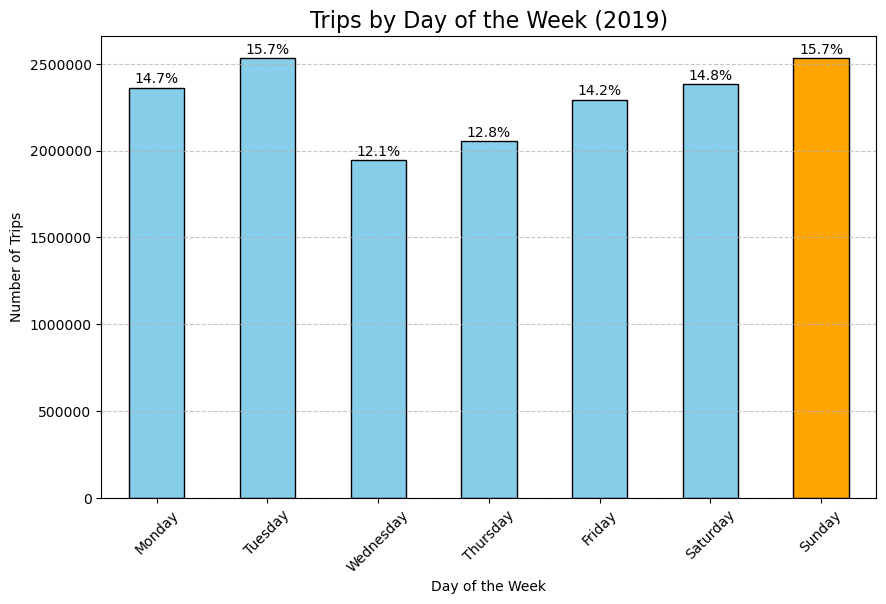

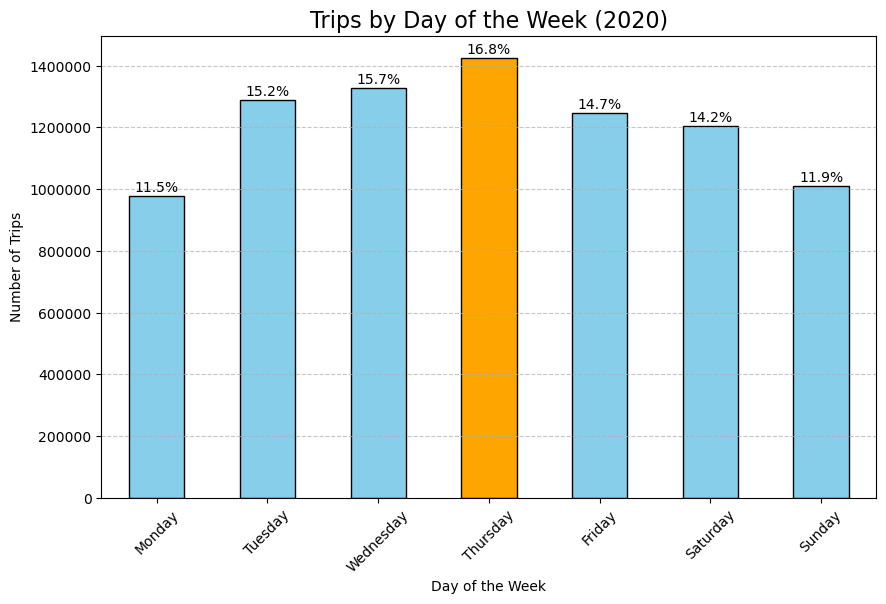

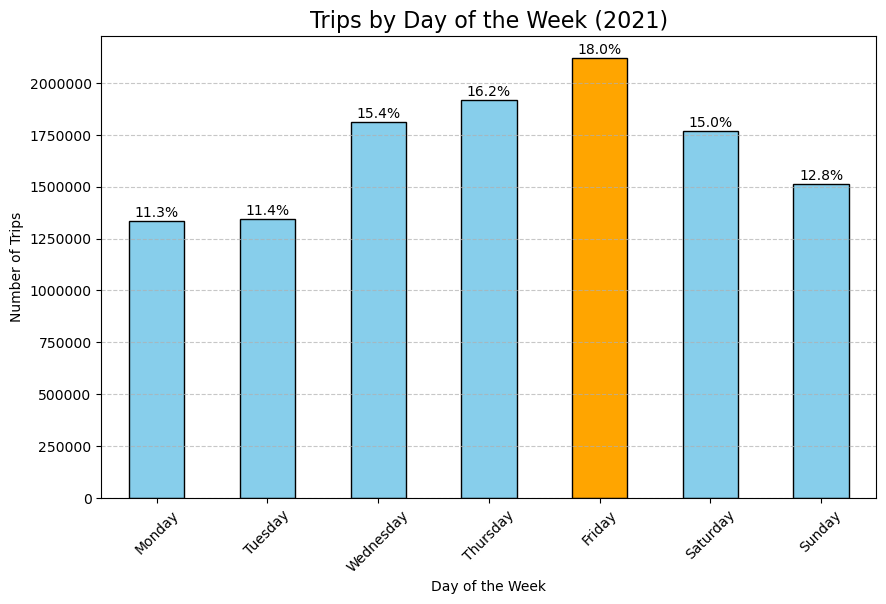

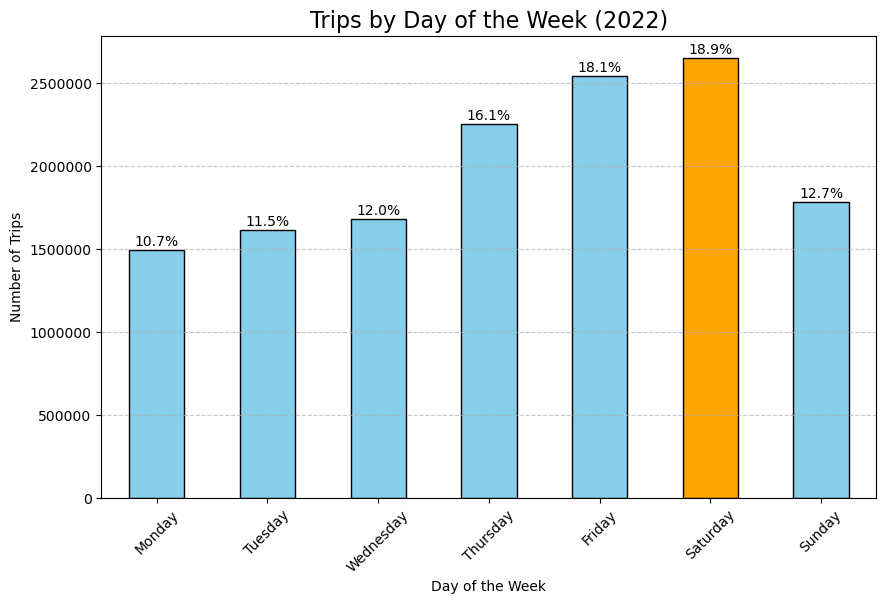

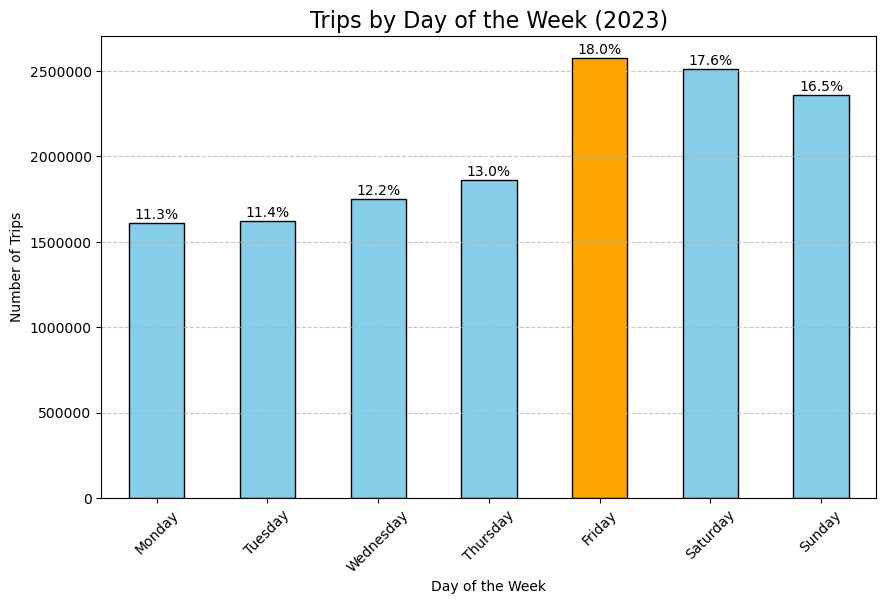

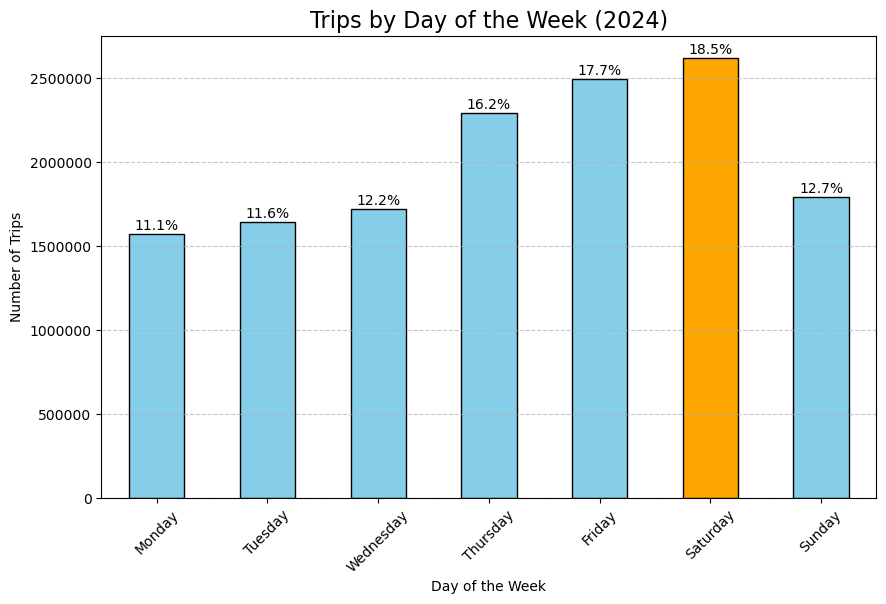

In [68]:
visualize_trips_by_day(cleaned_pq_files_2019,2019)
visualize_trips_by_day(cleaned_pq_files_2020,2020)
visualize_trips_by_day(cleaned_pq_files_2021,2021)
visualize_trips_by_day(cleaned_pq_files_2022,2022)
visualize_trips_by_day(cleaned_pq_files_2023,2023)
visualize_trips_by_day(cleaned_pq_files_2024,2024)

In [92]:
# File paths:
    #cleaned_pq_files_2019
    #cleaned_pq_files_2020
    #cleaned_pq_files_2021
    #cleaned_pq_files_2022
    #cleaned_pq_files_2023
    #cleaned_pq_files_2024


import pandas as pd
import matplotlib.pyplot as plt

def visualize_trips_by_time_of_day(file_paths, year):
    # Initialize an empty DataFrame to store aggregated data
    all_data = pd.DataFrame()

    time_periods = {
        'Morning': '5 AM - 11 AM',
        'Afternoon': '12 PM - 5 PM',
        'Evening': '6 PM - 10 PM',
        'Night': '11 PM - 4 AM'
    }    
    
    # Create a legend entry for time periods
    legend_entries = [f"{period}: {time}" for period, time in time_periods.items()]
    
    for file in file_paths:
        
        # Read Parquet file
        df = pd.read_parquet(file)

        # Convert pickup_datetime to datetime format and extract the hour
        df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
        df['hour'] = df['pickup_datetime'].dt.hour

        # Categorize trips by time of day
        def get_time_of_day(hour):
            if 5 <= hour <= 11:
                return 'Morning'
            elif 12 <= hour <= 17:
                return 'Afternoon'
            elif 18 <= hour <= 22:
                return 'Evening'
            else:
                return 'Night'

        df['time_of_day'] = df['hour'].apply(get_time_of_day)

        # Append data to all_data DataFrame
        all_data = pd.concat([all_data, df[['time_of_day']]], ignore_index=True)

    # Count trips by time of day for the entire year
    time_of_day_counts = all_data['time_of_day'].value_counts()

    # Define colors and explode settings
    colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
    explode = [0.1 if i == time_of_day_counts.idxmax() else 0 for i in time_of_day_counts.index]

    # Plot pie chart
    plt.figure(figsize=(10, 10))
    autopct = lambda p: f'{p:.1f}%\n({int(p * sum(time_of_day_counts) / 100):,})'
    time_of_day_counts.plot(
        kind='pie',
        autopct=autopct,
        startangle=90,
        colors=colors,
        explode=explode,
        labels=time_of_day_counts.index,
        textprops={'fontsize': 12}
    )
    plt.legend()
    plt.title(f'Total Trips by Time of Day ({year})', fontsize=16, fontweight='bold')
    plt.ylabel('')  # Remove y-axis label for better appearance
    plt.axis('equal')  # Ensure pie chart is circular

    # Add legend for time periods
    plt.legend(title="Time Periods", labels=legend_entries, loc='upper left', fontsize=6)    

    # Save plot as an image
    output_path = f'D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\plots\\trips_by_time_of_day\\trips_by_time_of_day_{year}.jpeg'
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()



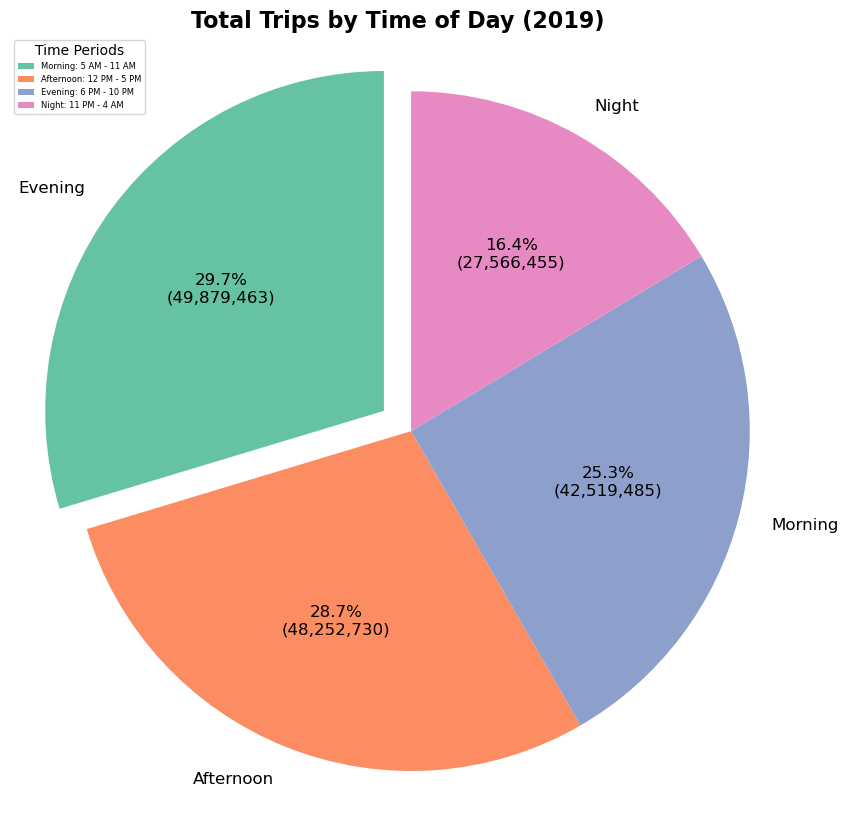

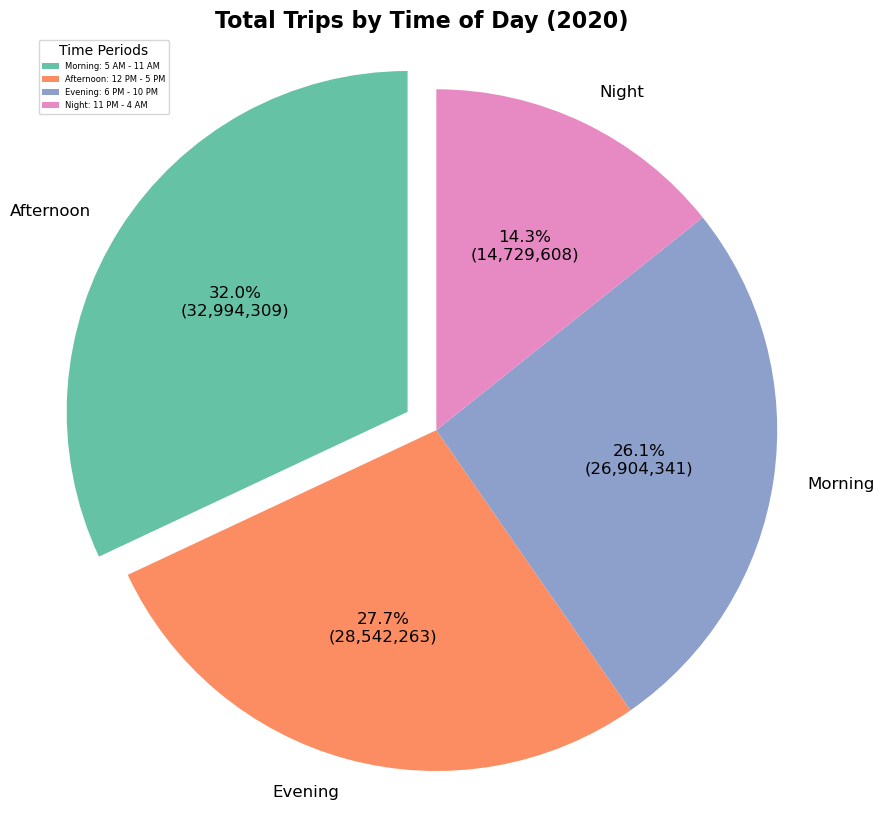

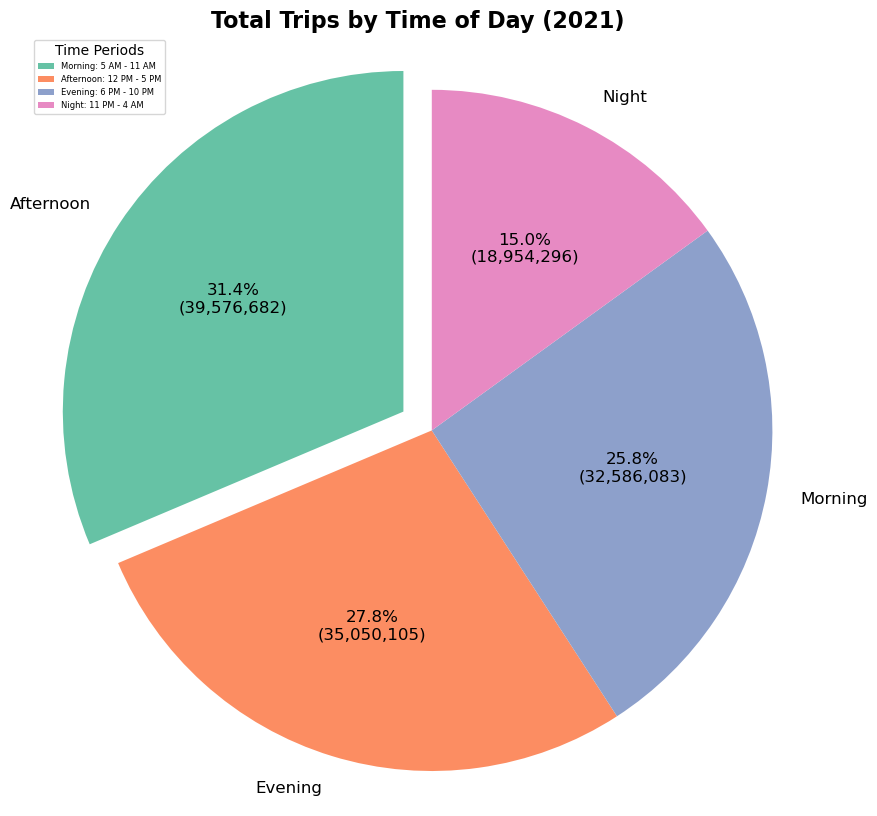

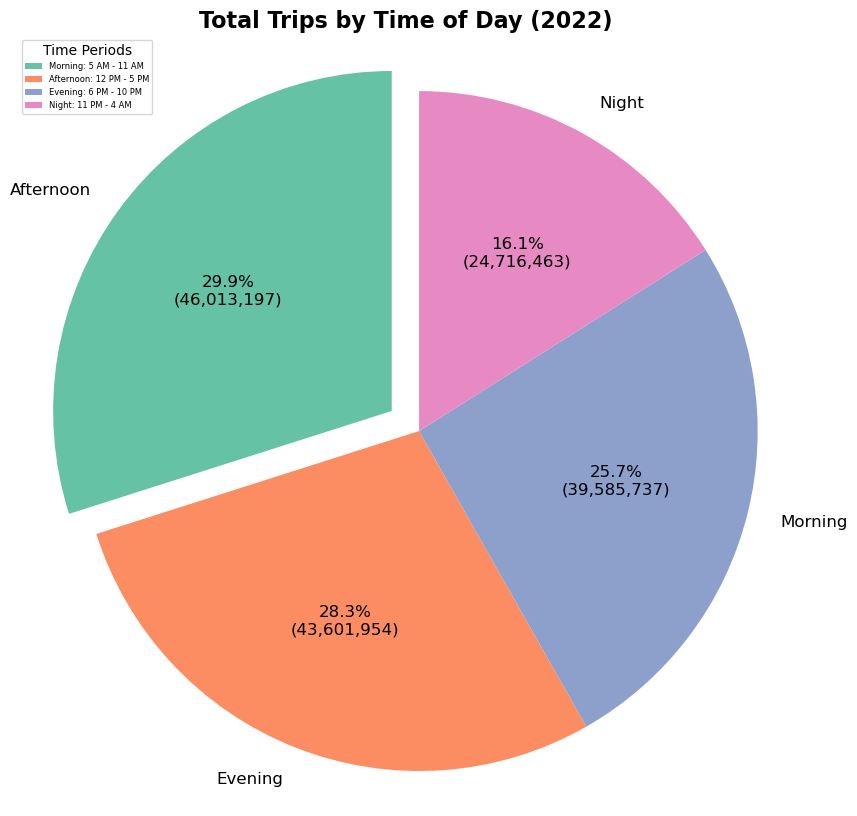

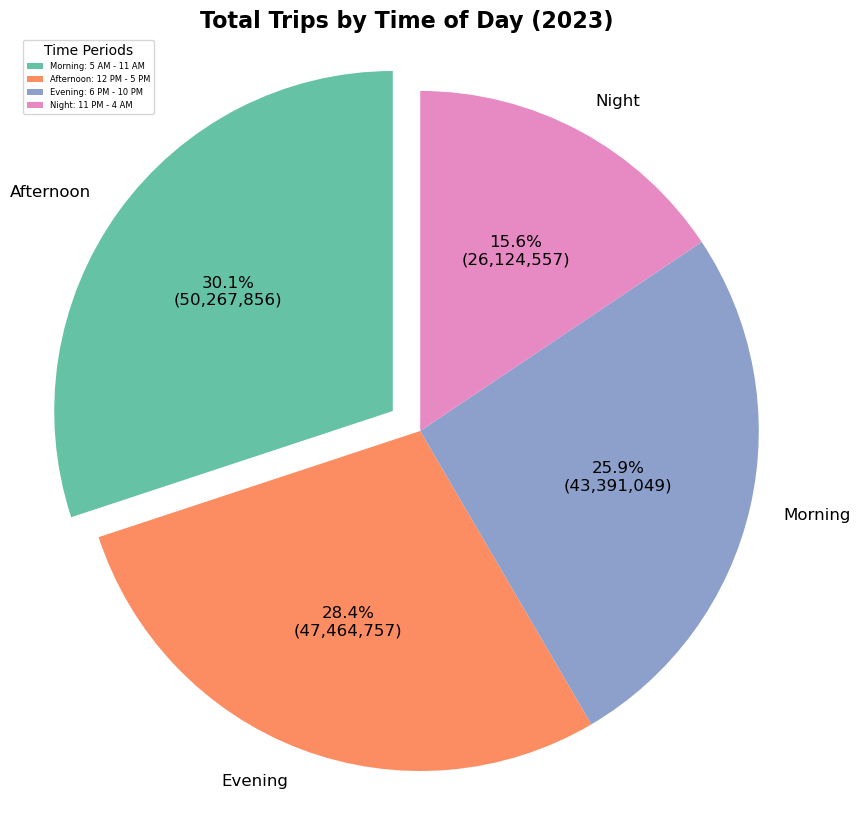

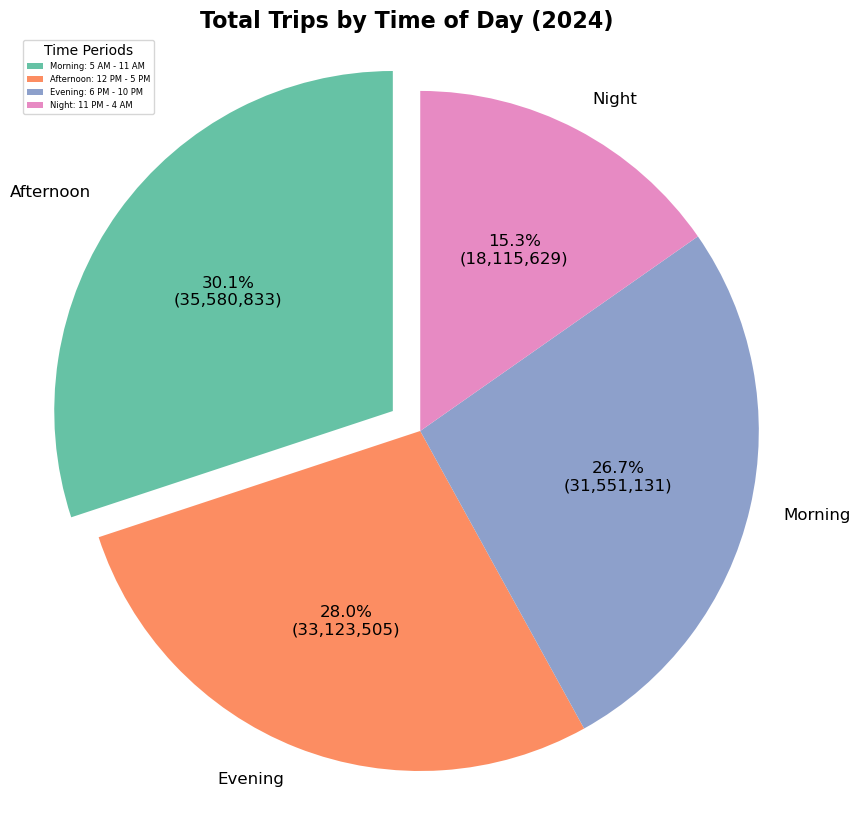

In [93]:
visualize_trips_by_time_of_day(cleaned_pq_files_2019,2019)
visualize_trips_by_time_of_day(cleaned_pq_files_2020,2020)
visualize_trips_by_time_of_day(cleaned_pq_files_2021,2021)
visualize_trips_by_time_of_day(cleaned_pq_files_2022,2022)
visualize_trips_by_time_of_day(cleaned_pq_files_2023,2023)
visualize_trips_by_time_of_day(cleaned_pq_files_2024,2024)

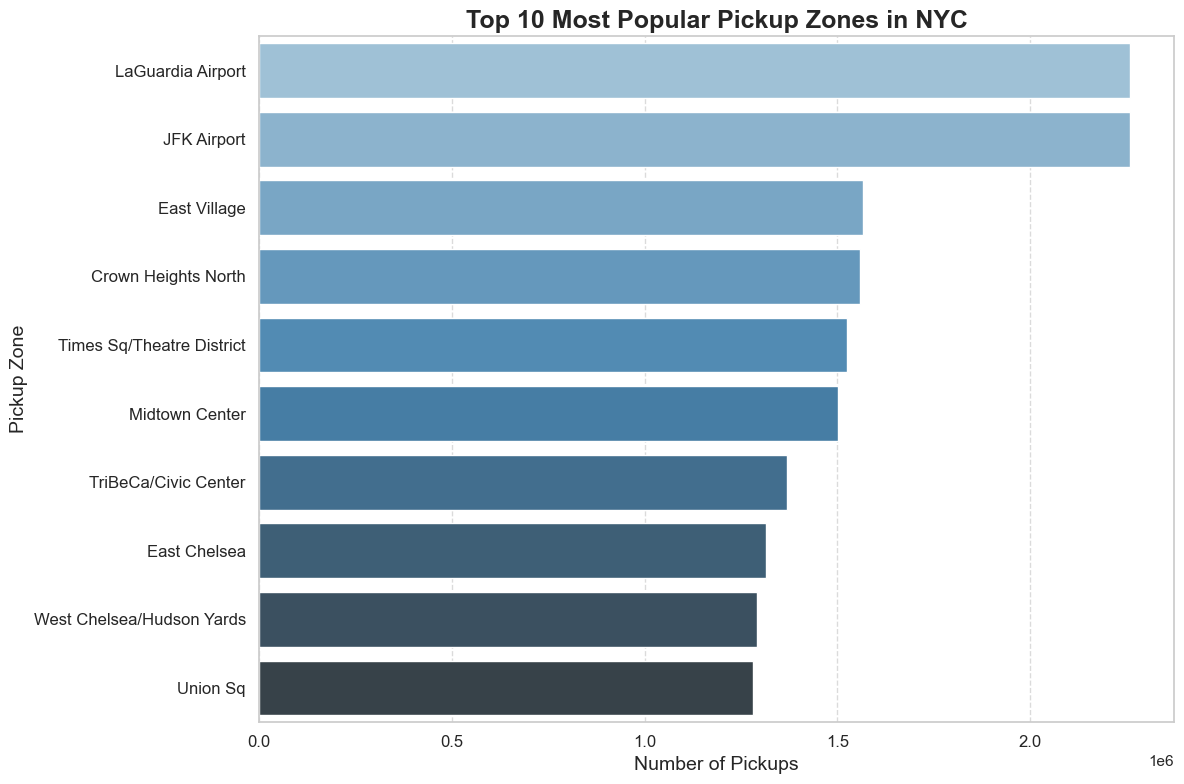

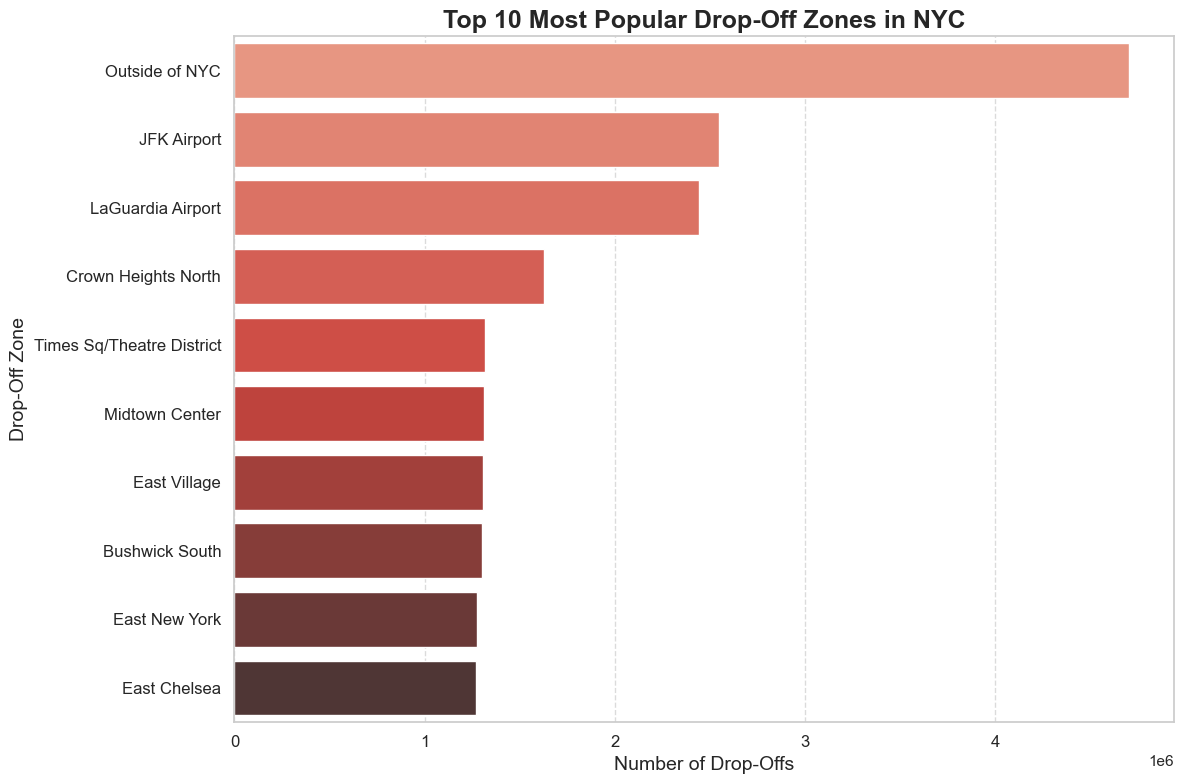

In [9]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the NYC Taxi Dataset with Dask
data = dd.read_parquet('D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\dataset\\fhvhv\\2024\\cleaned_2024\\*.parquet')

# Step 2: Load the TLC Zone Lookup Table (CSV file)
zone_lookup = pd.read_csv('D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\dataset\\fhvhv\\2024\\cleaned_2024\\taxi_zone_lookup.csv')  # The file contains LocationID, Zone, and Borough columns

# Step 3: Map PULocationID and DOLocationID to Zone Names
# Convert Dask DataFrame to Pandas for merging
data_pd = data[['PULocationID', 'DOLocationID']].compute()

# Merge pickup location names
data_pd = data_pd.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_pd.rename(columns={'Zone': 'Pickup_Zone', 'Borough': 'Pickup_Borough'}, inplace=True)
data_pd.drop(columns=['LocationID'], inplace=True)

# Merge drop-off location names
data_pd = data_pd.merge(zone_lookup, left_on='DOLocationID', right_on='LocationID', how='left')
data_pd.rename(columns={'Zone': 'Dropoff_Zone', 'Borough': 'Dropoff_Borough'}, inplace=True)
data_pd.drop(columns=['LocationID'], inplace=True)

# Step 4: Analyze Most Popular Zones
pickup_counts = data_pd['Pickup_Zone'].value_counts().head(10)
dropoff_counts = data_pd['Dropoff_Zone'].value_counts().head(10)



sns.set_theme(style="whitegrid")

# Top 10 Pickup Locations
plt.figure(figsize=(12, 8))
sns.barplot(x=pickup_counts.values, y=pickup_counts.index, palette='Blues_d')
plt.title('Top 10 Most Popular Pickup Zones in NYC', fontsize=18, weight='bold')
plt.xlabel('Number of Pickups', fontsize=14)
plt.ylabel('Pickup Zone', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Top 10 Drop-Off Locations
plt.figure(figsize=(12, 8))
sns.barplot(x=dropoff_counts.values, y=dropoff_counts.index, palette='Reds_d')
plt.title('Top 10 Most Popular Drop-Off Zones in NYC', fontsize=18, weight='bold')
plt.xlabel('Number of Drop-Offs', fontsize=14)
plt.ylabel('Drop-Off Zone', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Training RMSE: 11.379595956093752
Testing RMSE: 11.361645224662459
Training R²: 0.7654488809093806
Testing R²: 0.7650304284339348


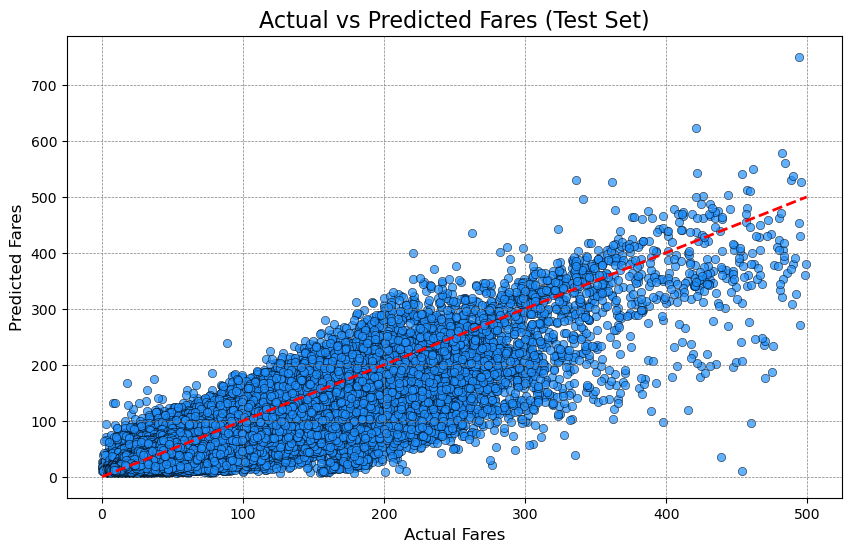

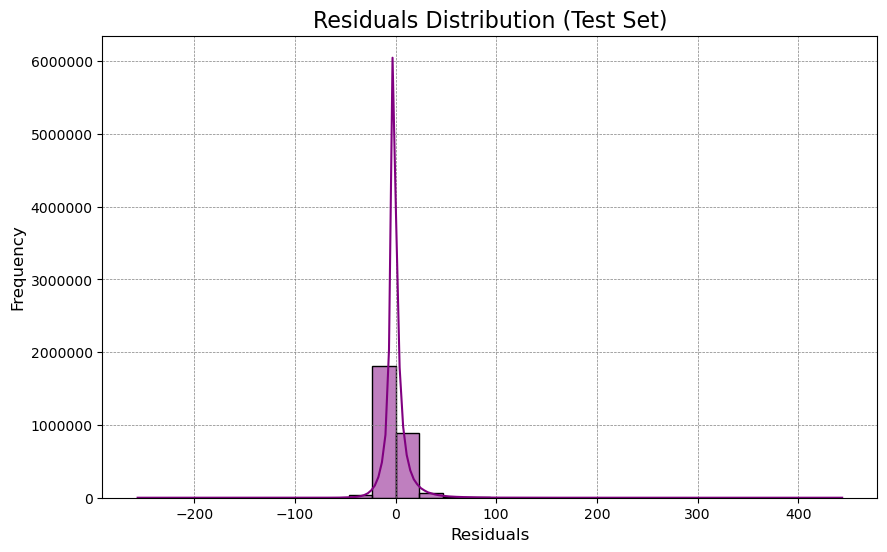

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
data = pd.read_parquet('D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\dataset\\fhvhv\\2024\\cleaned_2024\\fhvhv_tripdata_2024-08_cleaned.parquet')  
# Step 2: Data Preprocessing
data = data.dropna(subset=['base_passenger_fare', 'pickup_datetime', 'trip_miles'])
data = data[(data['base_passenger_fare'] > 0) & (data['base_passenger_fare'] < 500)]
data = data[(data['trip_miles'] > 0)]

data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['hour'] = data['pickup_datetime'].dt.hour
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['month'] = data['pickup_datetime'].dt.month

features = ['trip_miles', 'hour', 'day_of_week', 'month']
target = 'base_passenger_fare'

X = data[features]
y = data[target]

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Calculate metrics for training and testing sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")
print(f"Training R²: {train_r2}")
print(f"Testing R²: {test_r2}")

# Step 5: Enhanced Visualizations

# 1. Actual vs Predicted Scatter Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7, color='dodgerblue', edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)  # Perfect prediction line
plt.title('Actual vs Predicted Fares (Test Set)', fontsize=16)
plt.xlabel('Actual Fares', fontsize=12)
plt.ylabel('Predicted Fares', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


# Plot Residuals (Errors) for Test Set
residuals = y_test - y_test_pred  # Correctly defined residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')  # Use residuals here
plt.title('Residuals Distribution (Test Set)', fontsize=16)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.show()




In [ ]:
import dask.dataframe as dd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

start_time = time.time()

# Step 1: Load multiple Parquet files with Dask
data = dd.read_parquet('D:\\MS\\UMD\\Courses\\Fall-2024\\DATA602_Principle_of_data_science\\project\\Data-Analysis\\dataset\\fhvhv\\2024\\cleaned_2024\\fhvhv_tripdata_2024-08_cleaned.parquet')

# Step 2: Data Preprocessing
data = data.dropna(subset=['base_passenger_fare', 'pickup_datetime', 'trip_miles'])
data = data[(data['base_passenger_fare'] > 0) & (data['base_passenger_fare'] < 500)]
data = data[(data['trip_miles'] > 0)]

# Extract datetime features from pickup_datetime
data['pickup_datetime'] = dd.to_datetime(data['pickup_datetime'])
data['hour'] = data['pickup_datetime'].dt.hour
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['month'] = data['pickup_datetime'].dt.month

# Calculate trip duration in minutes (if dropoff_datetime is available)
if 'dropoff_datetime' in data.columns:
    data['dropoff_datetime'] = dd.to_datetime(data['dropoff_datetime'])
    data['trip_duration_minutes'] = (data['dropoff_datetime'] - data['pickup_datetime']).dt.total_seconds() / 60

# Select relevant features and target variable
features = ['trip_miles', 'hour', 'day_of_week', 'month']
if 'trip_duration_minutes' in data.columns:
    features.append('trip_duration_minutes')
target = 'base_passenger_fare'

X = data[features].compute()
y = data[target].compute()

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train and Evaluate Multiple Models

# b) Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# c) Support Vector Regression (SVR)
svr_model = SVR(kernel='rbf', C=100, gamma=0.1)
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

# Step 5: Evaluate Model Performance

def evaluate_model(y_true, y_pred, model_name):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return rmse, r2

rf_rmse, rf_r2 = evaluate_model(y_test, rf_pred, "Random Forest")
gb_rmse, gb_r2 = evaluate_model(y_test, gb_pred, "Gradient Boosting")
svr_rmse, svr_r2 = evaluate_model(y_test, svr_pred, "Support Vector Regression")


# 2. Residuals Distribution Plot for Gradient Boosting
residuals_gb = y_test - gb_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals_gb, kde=True, bins=30, color='purple')
plt.title('Residuals Distribution (Gradient Boosting)', fontsize=16)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

# 3. Bar Chart Comparing RMSE and R² Scores Across Models
metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'SVR'],
    'RMSE': [rf_rmse, gb_rmse, svr_rmse],
    'R²': [rf_r2, gb_r2, svr_r2]
})

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x='Model', y='RMSE', data=metrics_df, palette='coolwarm', ax=ax1)
ax1.set_ylabel('RMSE', fontsize=12)
ax1.set_title('Model Performance Comparison (RMSE & R²)', fontsize=16)

ax2 = ax1.twinx()
sns.lineplot(x='Model', y='R²', data=metrics_df, marker="o", sort=False, color="black", ax=ax2)
ax2.set_ylabel('R² Score', fontsize=12)

fig.tight_layout()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

end_time = time.time()
execution_time_seconds = end_time - start_time 
execution_time_minutes = execution_time_seconds / 60 

print(f"Execution Time: {execution_time_seconds} seconds") 
print(f"Execution Time: {execution_time_minutes} minutes")